___

## Binary Classification to Minimize the Monetary Loss
#### DJ Dawkins, Nathan Deinlein, Joseph Lazarus, and Puri Rudick​

DS7333 QTW: Case Study 7
___

This Notebook will cover the following topics in order: 
1. Business Overview and Objectives
2. Data Evaluation and Engineering
3. Modeling Preparations
4. Model Building and Model Evaluation
5. Results, Conclusions and Discussions
6. Moving Forward and Future Research

In [94]:
# Imports necessary python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

---
### Business Overview and Objectives

The objective for this case study is to build a classification model for an anonymized dataset to **minimize the monetary loss** due to incorrect predictions for the client.<br>
**The dataset is anonymized** due to the client privacy concerns, thus the lack of domain knowledge may hinder understanding of features.<br>
**Model interpretability is not a requirement**, only minimizing monetary loss and model performance.

>The client has shared that the loss associated with the predictions:
>- Incorrectly predictiction for Class 1, the client will lose $100
>- Incorrectly predictiction for Class 0, the client will lose $25
>- Correctly predictions will be no money lost

---
### Data Evaluation and Engineering

#### **Data Description:**
- This anonymized dataset has a total of 160k observations.
- The dataset contains 50 features (named x0 to x49).
    - 46 of the features are continous variables. Please note here that x32 and x37 originally contain % and $ signs which were removed.
    - 1 (x32) of the fratures is categorical numerical variable.
    - 3 of the features are categorical variables; x24 is continent, x29 is month, x30 is day.
- The target variable is binary, called 'y' with 2 values: Class 0 and Class 1. The classes are split 60/40 balanced with the positve target value having a prevlaence of ~40%.
    - *95,803* observations for Class 0
    - *64,197* observations for Class 1


In [95]:
# Read in data
# Save the file locally and read in using the file's path

# path = "./final_project(5).csv"
path = '/Users/puri/DataScience@SMU/10.DS7333 QTW/final_project(5).csv'
# path = 'C:/Users/puri.rudick/Downloads/final_project(5).csv'

df = pd.read_csv(path)

print('Dataset Shape:', df.shape)

# settings to display all columns
pd.set_option("display.max_columns", None)
df.head()

Dataset Shape: (160000, 51)


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.0%,-1.940031,-5.492063,0.627121,-0.873824,$1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02%,2.211462,-4.460591,1.035461,0.228270,$1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01%,0.419607,-3.804056,-0.763357,-1.612561,$430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01%,-3.442715,4.420160,1.164532,3.033455,$-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01%,-0.431640,12.165494,-0.167726,-0.341604,$-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [96]:
# "x24" is continent, "x29" is month, "x30" is day, "x32" is in % format, and "x37" is $ ammount

# Get rid of % and $ signs in x32 and x37 and change their data type to float
df["x32"] = df["x32"].str.replace("%","").astype(float)
df["x37"] = df["x37"].str.replace("$","").astype(float)

df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
0,-0.166563,-3.961588,4.621113,2.481908,-1.800135,0.804684,6.718751,-14.789997,-1.040673,-4.204950,6.187465,13.251523,25.665413,-5.017267,10.503714,-2.517678,2.117910,5.865923,-6.666158,1.791497,-1.909114,-1.737940,-2.516715,3.553013,euorpe,-0.801340,1.142950,1.005131,-18.473784,July,tuesday,-3.851669,0.00,-1.940031,-5.492063,0.627121,-0.873824,1313.96,-1.353729,-5.186148,-10.612200,-1.497117,5.414063,-2.325655,1.674827,-0.264332,60.781427,-7.689696,0.151589,-8.040166,0
1,-0.149894,-0.585676,27.839856,4.152333,6.426802,-2.426943,40.477058,-6.725709,0.896421,0.330165,-11.708859,-2.352809,-25.014934,9.799608,-10.960705,1.504000,-2.397836,-9.301839,-1.999413,5.045258,-5.809984,10.814319,-0.478112,10.590601,asia,0.818792,-0.642987,0.751086,3.749377,Aug,wednesday,1.391594,-0.02,2.211462,-4.460591,1.035461,0.228270,1962.78,32.816804,-5.150012,2.147427,36.292790,4.490915,0.762561,6.526662,1.007927,15.805696,-4.896678,-0.320283,16.719974,0
2,-0.321707,-1.429819,12.251561,6.586874,-5.304647,-11.311090,17.812850,11.060572,5.325880,-2.632984,1.572647,-4.170771,12.078602,-5.158498,7.302780,-2.192431,-4.065428,-7.675055,4.041629,-6.633628,1.700321,-2.419221,2.467521,-5.270615,asia,-0.718315,-0.566757,4.171088,11.522448,July,wednesday,-3.262082,-0.01,0.419607,-3.804056,-0.763357,-1.612561,430.47,-0.333199,8.728585,-0.863137,-0.368491,9.088864,-0.689886,-2.731118,0.754200,30.856417,-7.428573,-2.090804,-7.869421,0
3,-0.245594,5.076677,-24.149632,3.637307,6.505811,2.290224,-35.111751,-18.913592,-0.337041,-5.568076,-2.000255,-19.286668,10.995330,-5.914378,2.511400,1.292362,-2.496882,-15.722954,-2.735382,1.117536,1.923670,-14.179167,1.470625,-11.484431,asia,-0.052430,-0.558582,9.215569,30.595226,July,wednesday,-2.285241,0.01,-3.442715,4.420160,1.164532,3.033455,-2366.29,14.188669,-6.385060,12.084421,15.691546,-7.467775,2.940789,-6.424112,0.419776,-72.424569,5.361375,1.806070,-7.670847,0
4,-0.273366,0.306326,-11.352593,1.676758,2.928441,-0.616824,-16.505817,27.532281,1.199715,-4.309105,6.667530,1.965913,-28.106348,-1.258950,5.759941,0.472584,-1.150097,-14.118709,4.527964,-1.284372,-9.026317,-7.039818,-1.978748,-15.998166,asia,-0.223449,0.350781,1.811182,-4.094084,July,tuesday,0.921047,0.01,-0.431640,12.165494,-0.167726,-0.341604,-620.66,-12.578926,1.133798,30.004727,-13.911297,-5.229937,1.783928,3.957801,-0.096988,-14.085435,-0.208351,-0.894942,15.724742,1


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [98]:
print(df['y'].value_counts())
print(df['y'].value_counts(normalize=True))

0    95803
1    64197
Name: y, dtype: int64
0    0.598769
1    0.401231
Name: y, dtype: float64


#### **Statistical Summary Table**

In [99]:
df.describe()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x25,x26,x27,x28,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,y
count,159974.000000,159975.000000,159962.000000,159963.000000,159974.000000,159963.000000,159974.000000,159973.000000,159979.000000,159970.000000,159957.000000,159970.000000,159964.000000,159969.000000,159966.000000,159965.000000,159974.000000,159973.000000,159960.000000,159965.000000,159962.000000,159971.000000,159973.000000,159953.000000,159978.000000,159964.000000,159970.000000,159965.000000,159961.000000,159969.000000,159959.000000,159959.000000,159970.000000,159973.000000,159977.000000,159969.000000,159977.000000,159964.000000,159960.000000,159974.000000,159963.000000,159960.000000,159971.000000,159969.000000,159963.000000,159968.000000,159968.000000,160000.000000
mean,-0.001028,0.001358,-1.150145,-0.024637,-0.000549,0.013582,-1.670670,-7.692795,-0.030540,0.005462,0.002253,0.030232,-1.334402,0.007669,0.008104,0.001215,0.006223,0.012040,0.012694,0.024555,0.299074,-0.029137,0.008400,0.722028,-0.000806,-0.001066,-0.004159,0.031543,-0.005945,-0.000011,-0.006567,-0.000426,0.000936,0.006453,0.377628,6.059130,0.004253,-2.316526,6.701076,-1.833820,-0.002091,-0.006250,0.000885,-12.755395,0.028622,-0.000224,-0.674224,0.401231
std,0.371137,6.340632,13.273480,8.065032,6.382293,7.670076,19.298665,30.542264,8.901185,6.355040,7.871429,8.769633,14.750990,8.953837,6.964097,3.271779,4.984065,7.569351,4.540714,7.595316,5.806203,9.409635,5.412010,14.909127,1.263656,0.843258,6.774047,14.439534,2.767508,0.010400,1.747762,8.014180,2.379558,1.593183,999.945334,16.891603,5.134322,17.043549,18.680196,5.110705,1.534952,4.164595,0.396621,36.608641,4.788157,1.935501,15.036738,0.490149
min,-1.592635,-26.278302,-59.394048,-35.476594,-28.467536,-33.822988,-86.354483,-181.506976,-37.691045,-27.980659,-36.306571,-38.092869,-64.197967,-38.723514,-30.905214,-17.002359,-26.042983,-34.395898,-20.198686,-35.633396,-26.677396,-43.501854,-23.644193,-66.640341,-6.364653,-3.857484,-32.003555,-72.896705,-12.289364,-0.050000,-7.451454,-36.116606,-10.008149,-6.866024,-4734.540000,-74.297559,-22.101647,-74.059196,-82.167224,-27.933750,-6.876234,-17.983487,-1.753221,-201.826828,-21.086333,-8.490155,-65.791191,0.000000
25%,-0.251641,-4.260973,-10.166536,-5.454438,-4.313118,-5.148130,-14.780146,-27.324771,-6.031058,-4.260619,-5.288196,-5.903274,-11.379492,-6.029945,-4.696755,-2.207774,-3.344027,-5.071470,-3.056131,-5.101553,-3.607789,-6.361115,-3.649766,-9.268532,-0.852784,-0.567293,-4.597919,-9.702464,-1.874206,-0.010000,-1.183681,-5.401084,-1.610337,-1.068337,-691.370000,-5.249882,-3.458716,-13.953629,-5.804080,-5.162869,-1.039677,-2.812055,-0.266518,-36.428329,-3.216016,-1.320800,-10.931753,0.000000
50%,-0.002047,0.004813,-1.340932,-0.031408,0.000857,0.014118,-1.948594,-6.956789,-0.016840,0.006045,-0.018176,0.010941,-1.624439,-0.003473,0.002467,0.003535,0.012754,0.024541,0.015904,0.044703,0.433055,-0.026385,0.011144,1.029609,-0.003723,-0.001501,0.037138,0.244210,0.002013,0.000000,-0.006079,-0.013089,-0.002399,0.003645,-13.760000,6.184410,0.019068,-2.701867,6.840110,-1.923754,-0.004385,-0.010484,0.001645,-12.982497,0.035865,-0.011993,-0.574410,0.000000
75%,0.248532,4.284220,7.871676,5.445179,4.306660,5.190749,11.446931,12.217071,5.972349,4.305734,5.331573,5.935032,8.374524,6.041959,4.701299,2.211660,3.366853,5.101962,3.073002,5.164732,4.306566,6.316457,3.672678,11.028035,0.851765,0.567406,4.649773,9.936995,1.856369,0.010000,1.179460,5.411667,1.603089,1.079895,664.210000,17.420148,3.463308,8.981616,19.266367,1.453507,1.033275,2.783274,0.269049,11.445443,3.268028,1.317703,9.651072,1.000000
max,1.600849,27.988178,63.545653,38.906025,26.247812,35.550110,92.390605,149.150634,39.049831,27.377842,37.945583,36.360443,73.279354,42.392177,32.546340,13.782559,21.961123,37.057048,19.652986,33.515550,27.814560,46.237503,24.863012,58.490500,5.314169,3.951652,28.645074,67.753845,12.279356,0.050000,7.787120

#### **Missing Values:**
- There is no missing value in the target variable -- Yeah!
- All features have at least one missing value. (As shown in the shape of df_na in the code below with 50 rows.)
- Missing values count in each feature as shown in the bar chart below.
- The feature that has the most missing values is x23 with 47 missing value or less than 0.03% missing values
- We decided to keep all observations by looking at the compromise way to manipulate all missing values.  We will discuss more about this in the upcoming section.

In [100]:
# Count missing values
df_na = pd.DataFrame(df.isna().sum())
df_na.rename(columns={df_na.columns[0]: 'count'}, inplace = True)

df_na = df_na[df_na['count'] != 0]
df_na['percent_missing'] = df_na['count']/df.shape[0]
df_na = df_na.sort_values('count', ascending=False)

df_na.shape

(50, 2)

In [101]:
df_na.head()

,count,percent_missing
x23,47,0.000294
x10,43,0.000269
x34,41,0.000256
x33,41,0.000256
x18,40,0.000250


<AxesSubplot:xlabel='count', ylabel='index'>

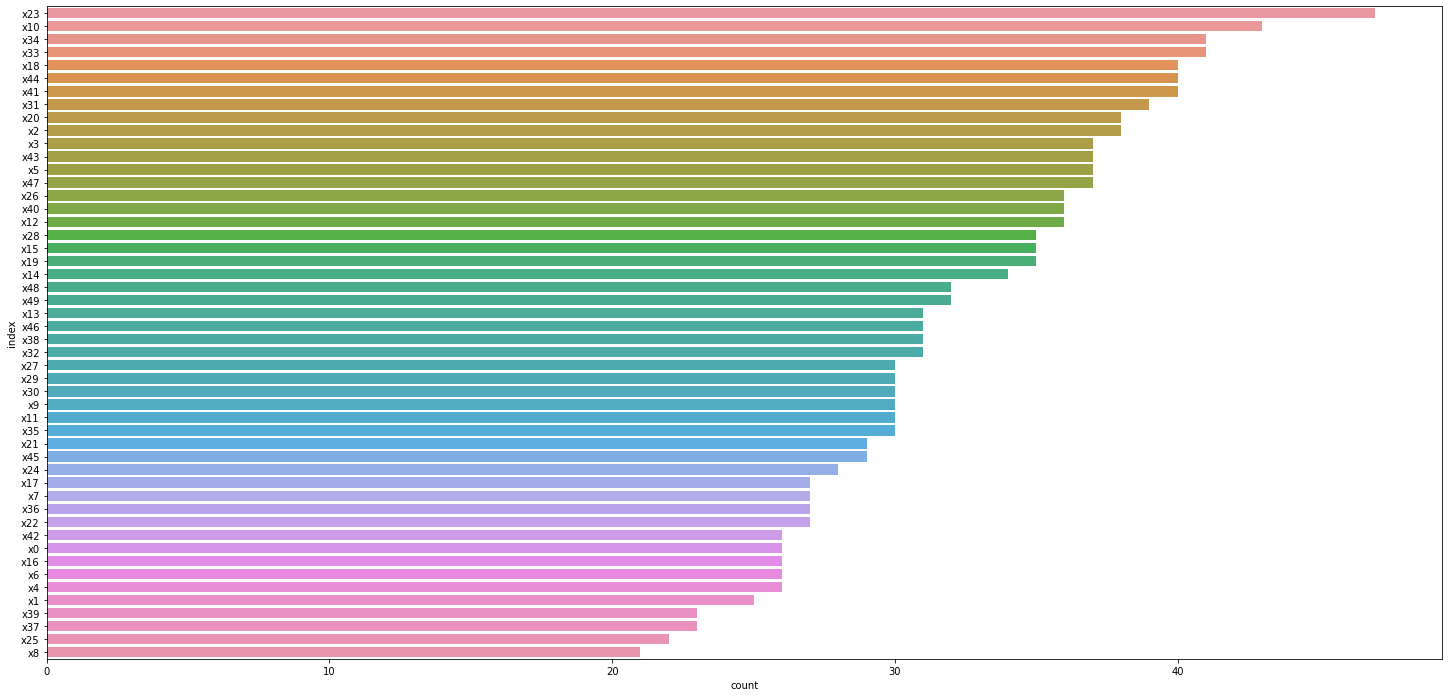

In [102]:
a4_dims = (25, 12)
fig, axes = plt.subplots(1, 1, figsize=a4_dims)
sns.barplot(x="count", y="index", data=df_na.reset_index())

#### **Duplicated Rows**
There is no duplicated rows.

In [103]:
# Check for duplicate rows
print('Duplicate rows: ', df.duplicated(keep='first').sum())

Duplicate rows:  0


#### **Data Distribution and Correlation**<br>
Too look at data distribution and correlation, we plotted histogrames, box plots, and correlation heatmap below.

<br><br>
**Histograms:**

Numerical Variables
- Histogram of x32 clearly shows that the fratures is categorical numerical variable.
- All 47 numerical variables take on either a normal-ish distribution or a uniform distribution.
- For features x2, x6, x20, x23, x40, and x49 the positive and negative classes appear to take on slightly different shapes but there is no major difference within each variable observations<br>

Categorical Variables
- x24 clearly shows the majority distribution of 'Asia'.
- x29 shows the majority distribution of 'July' follows by 'June'.
- x30 clearly shows the majority distribution of 'Wednesday'.

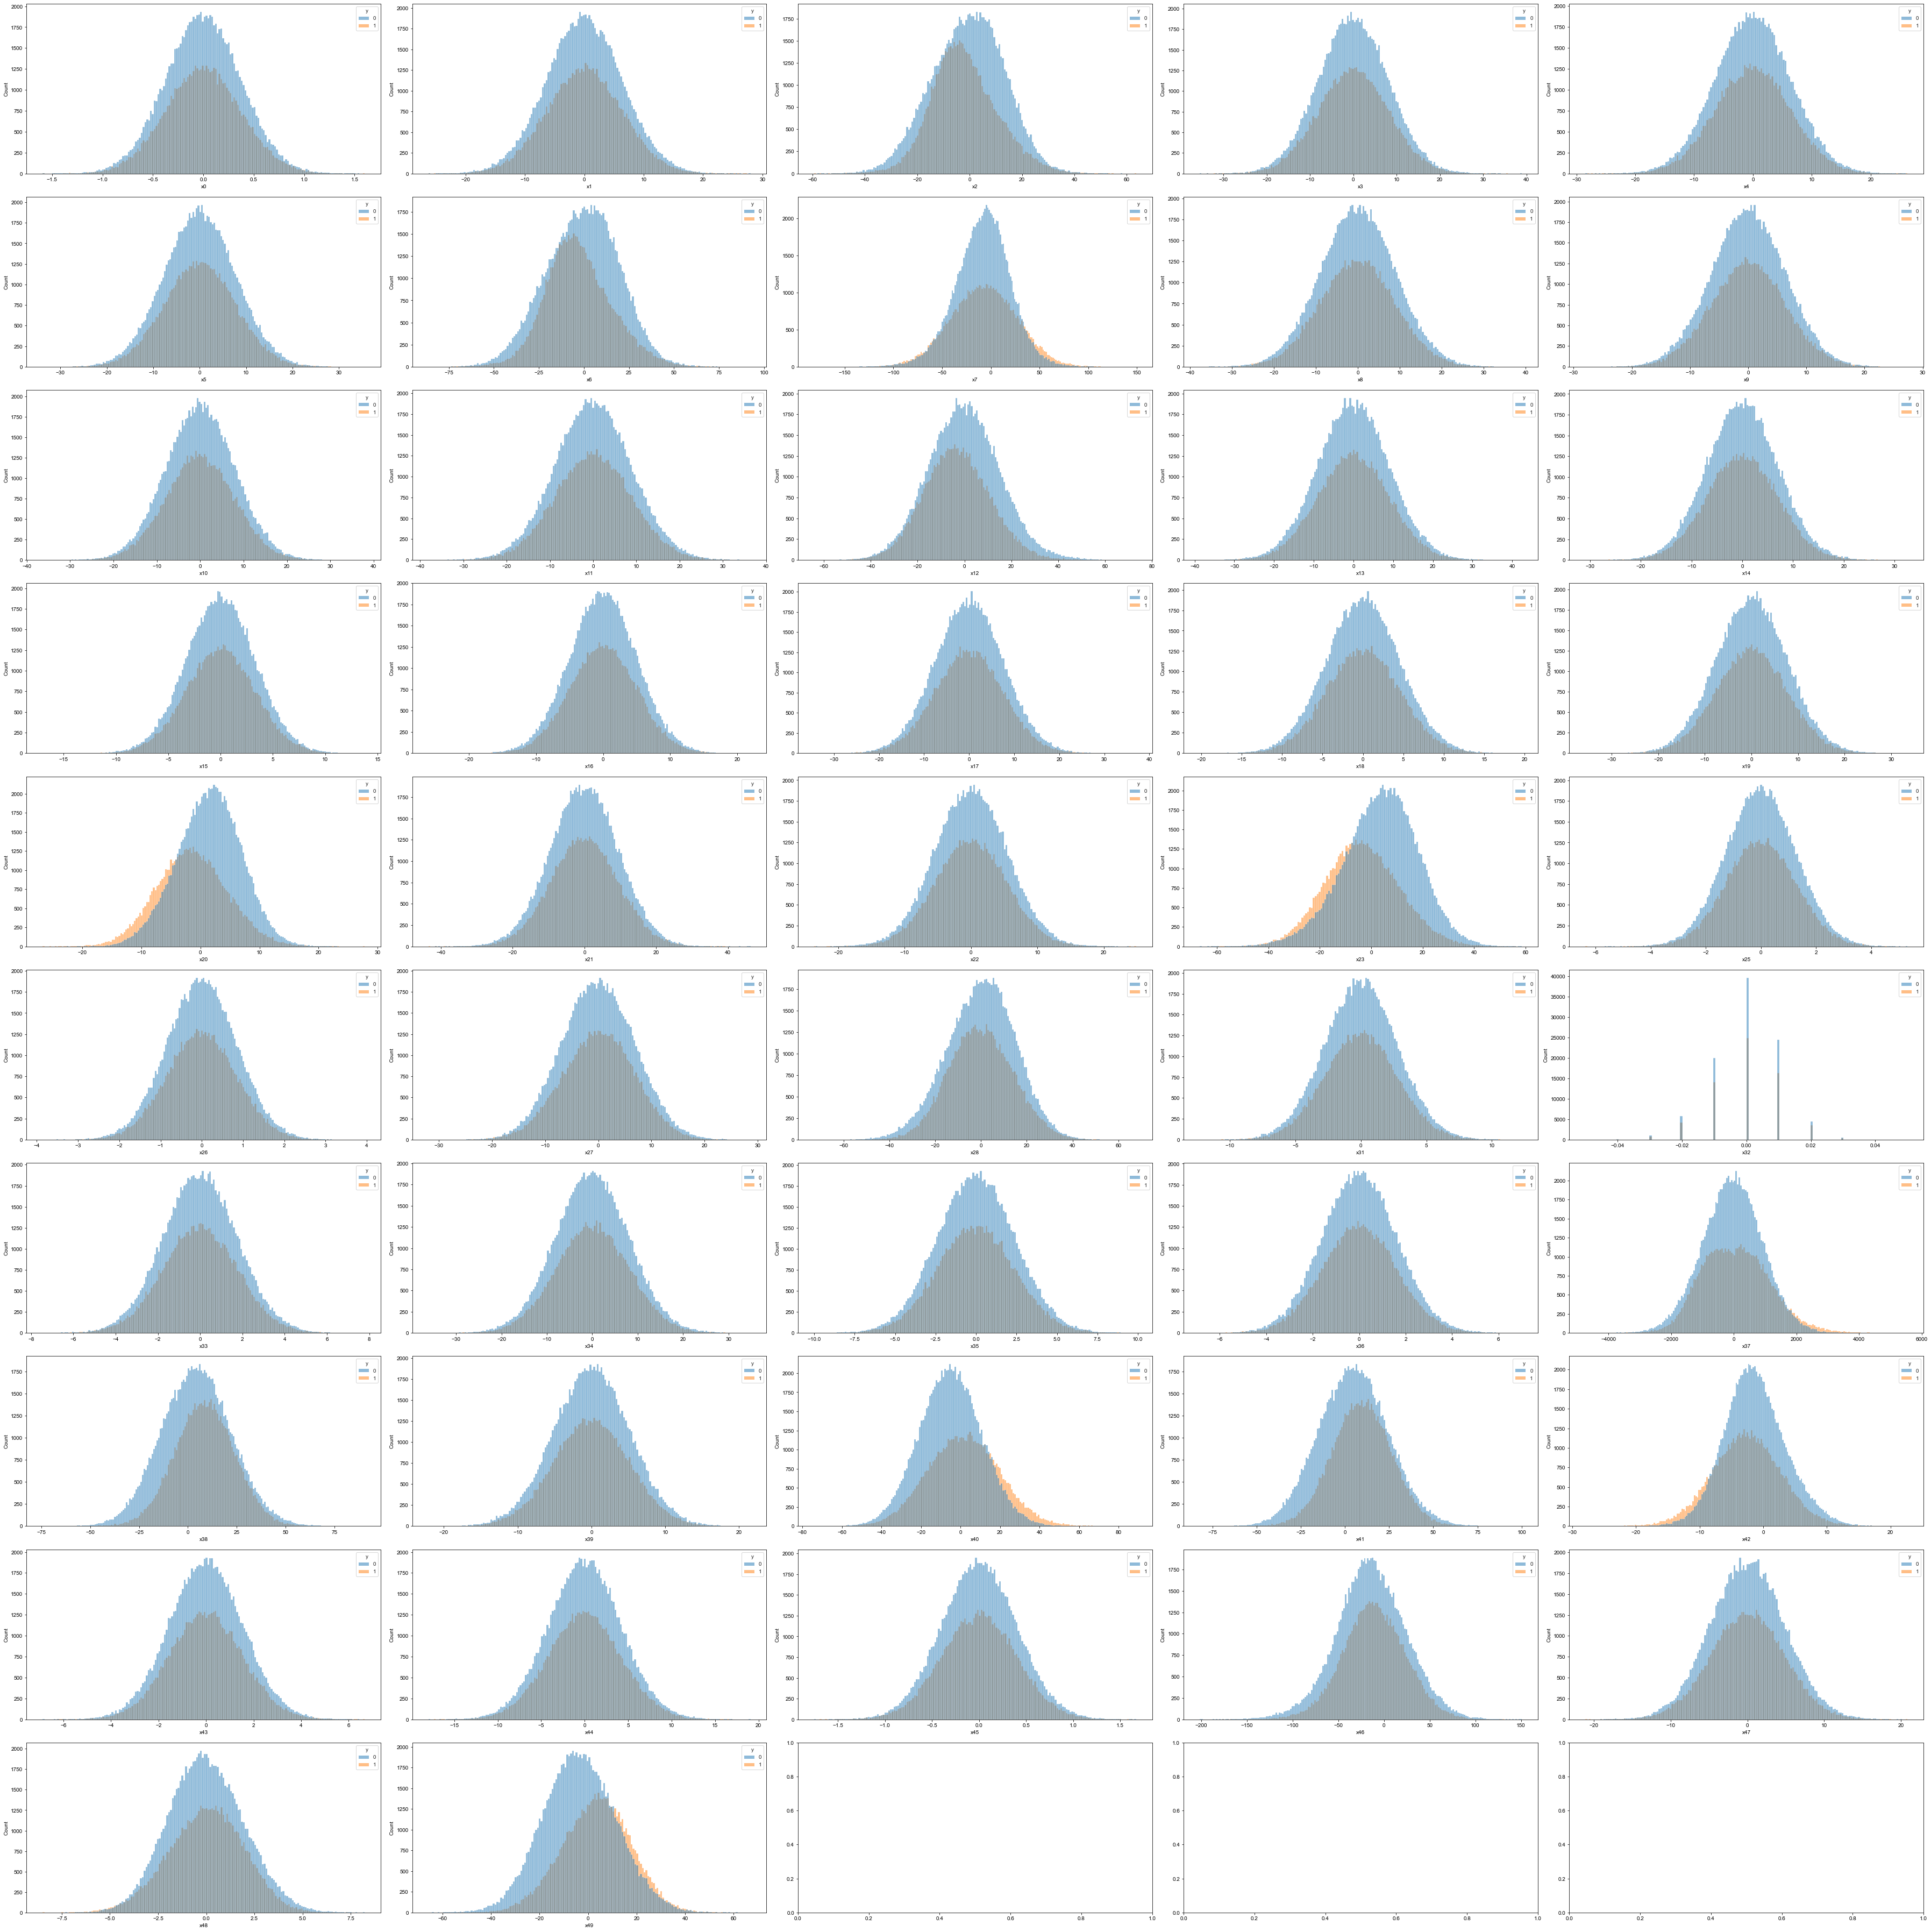

In [104]:
df_features = df.copy()
df_features.drop(["y"], axis=1, inplace=True)

df_features_col_list = list(df_features.columns)
cat_ft_list = ["x24", "x29", "x30"]
continuous_ft_list = [e for e in df_features_col_list if e not in cat_ft_list]

fig,axs = plt.subplots(10,5, figsize = (50,50))
# sns.set(font_scale = 1.2)
sns.set_style("ticks")
h, v = 0, 0
for i in continuous_ft_list:
    sns.histplot(data=df, x=i, hue='y', multiple='layer', ax=axs[h, v])
    if v == 4:
        h += 1
        v = 0
    else:
        v += 1
        
fig.tight_layout()

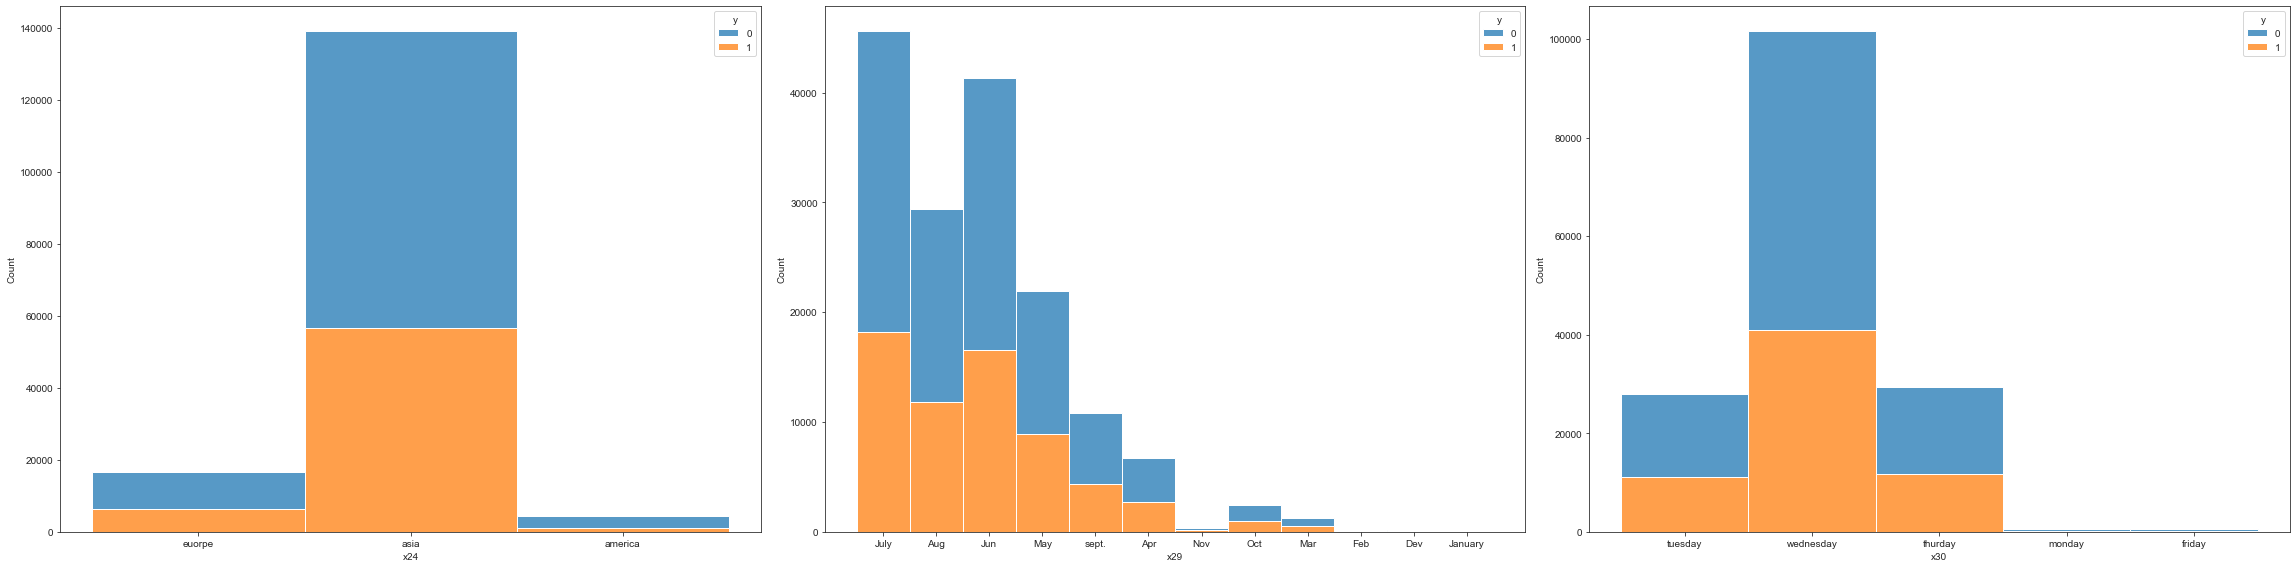

In [105]:
fig,axs = plt.subplots(1,3, figsize = (32,8))
h, v = 0, 0
for i in cat_ft_list:
    sns.histplot(data=df, x=i, hue='y', multiple='stack', ax=axs[v])
    v += 1
        
fig.tight_layout()

**Box Plot:**

- We split the box plot of x37 from other numerical variables due to its wide scale.
- Looking at the *standard diviation (std)* of each feature, especially on the plot of features std plot, there are 3 features that have extremely high std compare to other features: x7, x46, and x37.

<AxesSubplot:>

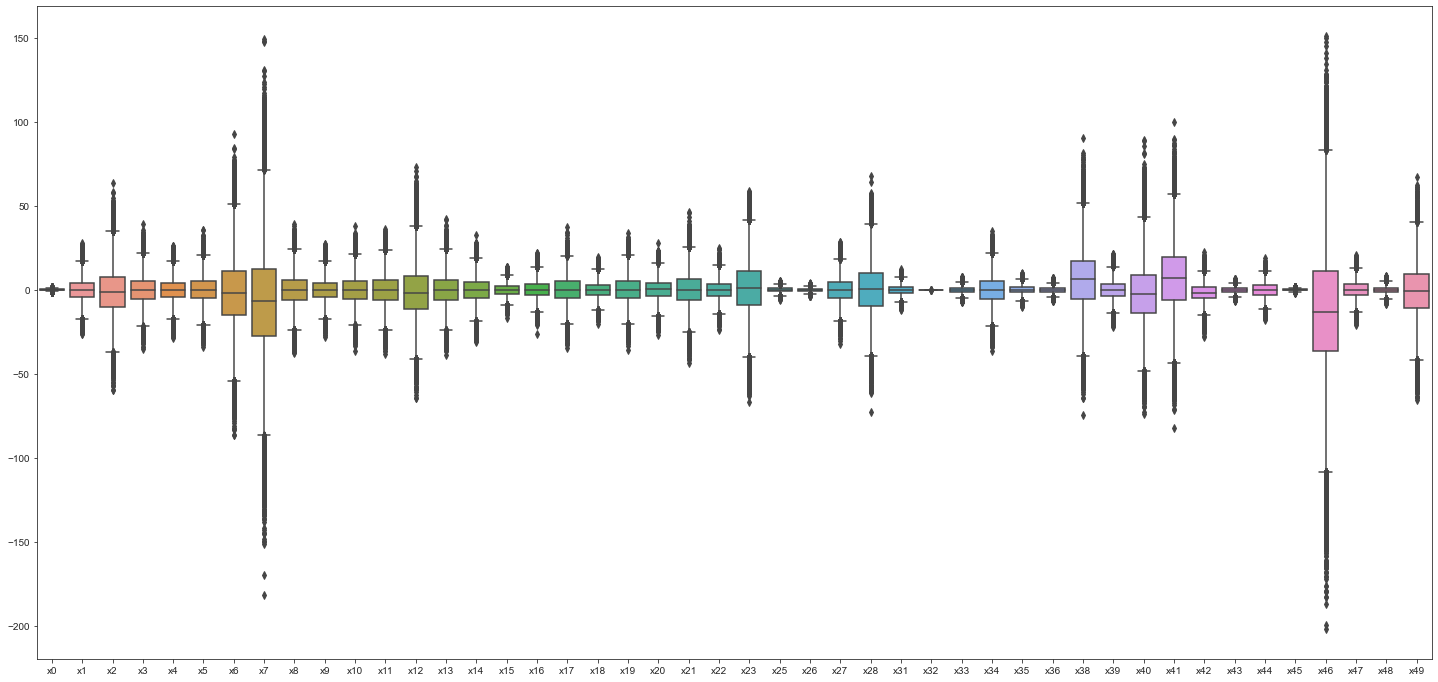

In [106]:
fig, axes = plt.subplots(figsize=a4_dims)

sns.boxplot(data = df[[i for i in df.columns if i not in ['x37','y']]])

<AxesSubplot:>

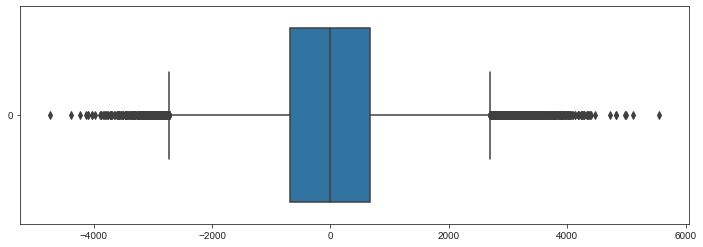

In [107]:
fig, ax = plt.subplots(figsize=(12,4))

sns.boxplot(data = df['x37'], orient='h')

**Correlation Heatmap:**
- The correlation heatmap below clearly displays that there is no strong evidence of correlation was found among all of the features.

<AxesSubplot:>

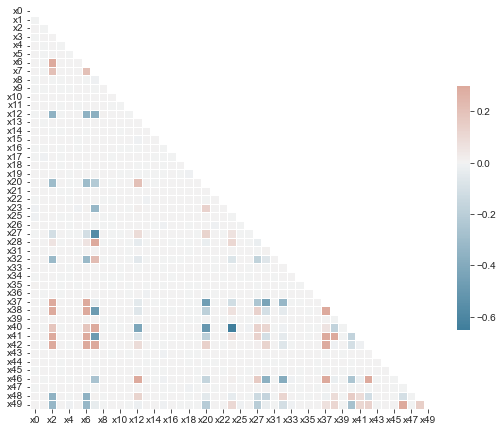

In [108]:
# Get correlation
corr = df[continuous_ft_list].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(9, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

---
### Data Manipulations and Model Preparations

**At this point, the dataset still contains the missing values. Before filling in missing values, we splitted the dataset into train and test sets. Then filled in the missing value in each set separately.**

1. We used train_test_split function from sklearn to split the dataset into **90% of the dataset to the train and 10% to the test dataset**. <br>
To make sure that we have the validate dataset that is not invaded by model building process.<br>
Using train_test_split function, we have got:
    - Train Dataset: 144k obs. - 86,239 as Class '0' and 57,761 as Class '1'
    - Test Dataset: 16k obs. - 9,564 as Class '0' and 6,436 as Class '1'
2. **The missing values then filled in the train and test set separately**
    - For categorical variables (x24, x29, and x30) and categorical numerical variable (x32), we filled the missing values for each variable with its most frequently occurring value (mode).
    - For continuous variables with high high std compare to other features (x7, x46, and x37) as mentioned in the section above, we filled the missing values for each variable with its median. This is to make sure that some extreme outliers will not affect the fill-in values.
    - For other continuous variables, we filled the missing values for each variable with its mean.
3. We use **One Hot Encoding** with all three categorical variables to create new binary columns, indicating the presence of each possible value from the original data. On other words, One Hot Encoding is used to convert numerical categorical variables into binary vectors.
4. **StandardScaler** function from sklearn is used to scale all features.

#### Split Train and Test Dataset

In [109]:
from sklearn.model_selection import train_test_split

# Random Forest - Using Full_df
model_data = df.copy()

feature_data = model_data.copy()
feature_data.drop(['y'], axis=1, inplace=True)

target_data = model_data['y']

# Splitted train and test dataset
X_train, X_test, y_train, y_test = train_test_split(feature_data, target_data, test_size=0.10, random_state=0)

print("Size of modeling set (to be CV split): ", X_train.shape)
print(y_train.value_counts())
print(y_train.value_counts(normalize=True))
print("Size of hold back validation set: ", X_test.shape)
print(y_test.value_counts())
print(y_test.value_counts(normalize=True))

Size of modeling set (to be CV split):  (144000, 50)
0    86239
1    57761
Name: y, dtype: int64
0    0.598882
1    0.401118
Name: y, dtype: float64
Size of hold back validation set:  (16000, 50)
0    9564
1    6436
Name: y, dtype: int64
0    0.59775
1    0.40225
Name: y, dtype: float64


##### Fill in Missing Values

In [110]:
mode_replace_cols = cat_ft_list + ['x32']
median_replace_cols = ['x7', 'x37', 'x46']
mean_replace_cols = [e for e in continuous_ft_list if e not in (median_replace_cols + mode_replace_cols)]

# Replace missing values in catergorical and catergorical numerical variables with its mode.
for col in mode_replace_cols:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    X_test[col].fillna(X_test[col].mode()[0], inplace=True)

# Replace missing values in numerical variables with its mean.
for col in mean_replace_cols:
    X_train[col].fillna(X_train[col].mean(), inplace=True)
    X_test[col].fillna(X_test[col].mean(), inplace=True)

# Replace missing values in numerical variables with its median.
for col in median_replace_cols:
    X_train[col].fillna(X_train[col].median(), inplace=True)
    X_test[col].fillna(X_test[col].median(), inplace=True)

#### One Hot Encoding for Categorical Variables

In [111]:
from sklearn.preprocessing import OneHotEncoder

# using pd get dummies for the category columns we are keeping
dummies_train = pd.get_dummies(X_train[cat_ft_list],drop_first=True)
#dropping original columns
X_train = X_train.drop(cat_ft_list,axis=1)
#concating dummies to the data frame
X_train = pd.concat([X_train,dummies_train],axis=1)
print('X_train shape:', X_train.shape)


dummies_test = pd.get_dummies(X_test[cat_ft_list],drop_first=True)
X_test = X_test.drop(cat_ft_list,axis=1)
X_test = pd.concat([X_test,dummies_test],axis=1)
print('X_test shape:', X_test.shape)

X_train shape: (144000, 64)
X_test shape: (16000, 64)


####  StandardScaler is used to scale all features.

In [112]:
#Scale new predictor matrix
from sklearn.preprocessing import StandardScaler

scl_obj = StandardScaler()

scl_obj.fit(X_train)
X_train_ = scl_obj.transform(X_train)

scl_obj.fit(X_test)
X_test_ = scl_obj.transform(X_test)

---
### Classification Models
To approach the objectives of this case study, we built and evaluated six different models: Logistice Regression, Random Forest, XGBoost, Dense Neural Networks, Linear Regression Ensemble and Neural Network Ensemble models.<br>
We will discuss more in detail about each model in it owns section.
<br><br>
### Model Evaluation
<img src="https://blog.paperspace.com/content/images/2020/09/Fig01.jpg" style="float: right" width="400"/>

*Let us introduce the confusion metric shows on the right hand side:*
- *True Positive (TP): You predicted positive and it’s true.*
- *True Negative (TN): You predicted negative and it’s true.*
- *False Positive (FP): You predicted positive and it’s false.*
- *False Negative (FN): You predicted negative and it’s false.*

To evaluate the models, we used each model to make a prediction on the test dataset then we evaluate 5 matrics below:

1) **Monetary Loss per Prediction** -- Our most important matric!<br>
As what we mentioned in the section above that for incorrectly predictiction for Class 1, the client will lose $100 and for incorrectly predictiction for Class 0, the client will lose $25.<br>
To find the amount of average money lost per prediction, we can use the equation below.  We built a function called 'lost_per_obs'.
> $$ \text{Monetary Loss per Prediction =} \frac{(FP*100) + (FN*25)}{\text {No. of Predictions}} $$

2) **Accuracy**: Model accuracy is defined as the number of classifications a model correctly predicts divided by the total number of predictions made. In other words, 'what percent of our prediction is right?'|.
> $$ Accuracy = \frac{TP+TN}{ALL} $$

3) **Precision**: The precision measures the model's performance in classifying a sample as positive. In other words, 'what percent of bankruptcy prediction were corrected?'.
> $$ Precision = \frac{TP}{TP+FP} $$

4) **Recall**: The recall measures the model's ability to detect Positive samples. The higher the recall, the more positive samples detected. In other words, 'what percent of bankruptcy did ee catch?'.
> $$ Recall = \frac{TP}{TP+FN} $$

5) **F1 Score**: The F1-score combines the precision and recall of a classifier into a single metric by taking their harmonic mean. In other words, 'it is an average of presicion and recall'.
> $$ F1-Score = \frac{2 * Precision * Recall}{Precision + Recall} $$

###### *<div style="text-align: right">Image Credits: https://blog.paperspace.com/</div>*

In [113]:
# import neccessaty packages
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler,  OneHotEncoder

In [114]:
false_positive = 100
false_negative = 25

def lost_per_obs(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    w = np.array([[0, false_positive], [false_negative, 0]])
    total_lost = cm * w
    return total_lost.sum()/cm.sum()

In [115]:
# Create scorer for those 4 matrices mentioned above.
scorer = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'F1': make_scorer(f1_score, average='macro'), 
    'money_lost': make_scorer(lost_per_obs, greater_is_better=False)
}

#### Created a dataframe to collect model evaluation matrices on test dataset.

In [121]:
test_matrices = pd.DataFrame(columns=['model', 'acc', 'precision', 'recall', 'f1', 'money_lost_per_obs'])

---
### Model Building
<img src="https://pimages.toolbox.com/wp-content/uploads/2022/04/11040522/46-4.png" style="float: right" width="400"/>

### **Logistic Regression**

Logistic regression is a statistical analysis method to predict a binary outcome. Which sounds about right to be one of our choices to use for this case study. Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class. It estimates the probability of a target variable as a function of features.

There are some Advantages of the Logistic Regression Algorithm:
- Logistic regression performs better when the data is linearly separable
- It does not require too many computational resources as it’s highly interpretable
- There is no problem scaling the input features—It does not require tuning
- It is easy to implement and train a model using logistic regression
- It gives a measure of how relevant a predictor (coefficient size) is, and its direction of association (positive or negative)
###### *<div style="text-align: right">Image Credits: https://www.spiceworks.com/tech/artificial-intelligence/articles/what-is-logistic-regression/</div>*

To build the logistic regression model, we used the steps below:
1. To find the best model parameters, we use **RandomizedSearchCV**. The RandomizedSearchCV, in contrast to GridSearchCV, not all parameter values are tried out, but rather a fixed number of parameter settings is sampled from the specified distributions. This can help us save tremendous amount on computational cost. We commented this block of code out to help save time in case of code re-execute.
2. We then fitted the model best parameter to the train dataset using **coss_validation (cv=5)**.
3. To find the optimal threshold that give the best model performance on Monetary Loss per Prediction (within good range of Accuracy), we plotted line graph for model's Monetary Loss per Prediction and Accuracy against threshold number (from 0 to 1). To plot the graph, we created a function called 'threshold_plot'.
4. Finally, we fitted the model with optimal threshold to the test dataset then evaluated all 5 model matices.


#### Use RandomizedSearchCV to Find Best Model Parameters

In [117]:
# lr = LogisticRegression()

# # Setup model parameters for RandomSearchCV
# param_grid = {
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
#     'C': [1, 10, 20],
#     'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
#     'class_weight': [None, 'balanced'],
# }

# lr_ = RandomizedSearchCV(lr, param_grid, scoring=make_scorer(lost_per_obs, greater_is_better=False), n_jobs=-1, verbose=0, random_state=42)

# lr_.fit(X_train_, y_train)
# lr_.best_params_

#### Fitted Model Best Parameter to the Train Dataset Using coss_validation (cv=5)

In [118]:
lr_model = LogisticRegression(
    penalty = 'l1', 
    C = 1,
    solver = 'saga',
    class_weight = None
)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore")
    model_lr = cross_validate(lr_model, X_train_, y_train, cv=5, scoring=scorer, error_score="raise")

print("Mean Accuracy = ",model_lr['test_accuracy'].mean())
print("Mean Precision = ",model_lr['test_precision'].mean())
print("Mean Recall = ",model_lr['test_recall'].mean())
print("Mean F1 = ",model_lr['test_F1'].mean())
print("Mean Monetary Loss per Prediction = ",model_lr['test_money_lost'].mean())

Mean Accuracy =  0.7023472222222222
Mean Precision =  0.692427881189726
Mean Recall =  0.6717888156904752
Mean F1 =  0.6755491936949238
Mean Monetary Loss per Prediction =  -15.242881944444443


#### Created a function called 'threshold_plot' 

In [122]:
def threshold_plot(y_true, y_pred):

    threshold_df = pd.DataFrame(columns=['threshold', 'accuracy', 'lost_per_obs'])

    for c in np.arange(0, 1, .01):
        y_pred_ = [int(p >= c) for p in y_pred]
        threshold_df.loc[len(threshold_df)] = [c, accuracy_score(y_true, y_pred_), lost_per_obs(y_true, y_pred_)]
    
    print('Top 5 thresholds with the smallest amounts of monetary loss per prediction are:\n', threshold_df.nsmallest(5, 'lost_per_obs'))

    ax = threshold_df.plot(x = 'threshold', y = 'lost_per_obs', color='r')
    ax.legend(loc="upper left")
    ax2 = ax.twinx()
    threshold_df.plot(x = 'threshold', y = 'accuracy', ax=ax2, color='b')

#### Plotted line graph for model's Monetary Loss per Prediction and Accuracy to find the opitimal threshold.

Top 5 thresholds with the smallest amounts of monetary loss per prediction are:
     threshold  accuracy  lost_per_obs
85       0.85  0.620882      9.740972
86       0.86  0.618576      9.748090
87       0.87  0.616368      9.755903
88       0.88  0.614514      9.763715
84       0.84  0.622785      9.766319


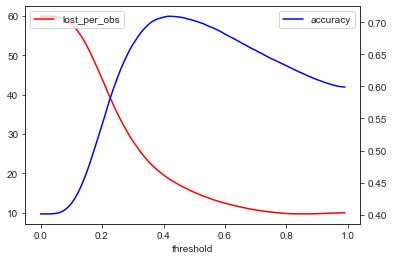

In [123]:
lr_model.fit(X_train_, y_train)

y_train, y_model_pred = y_train, lr_model.predict_proba(X_train_)[:,1]
threshold_plot(y_train, y_model_pred)

#### Fitted the model with optimal threshold to the test dataset then evaluated all 5 model matices.

In [124]:
y_true, y_pred = y_test, lr_model.predict_proba(X_test_)[:,1]

threshold = 0.85
y_pred = [int(p >= threshold) for p in y_pred]
report = classification_report(y_true, y_pred, output_dict=True)

model_name = 'Logistic Regression (th=' + str(threshold) + ')'

l = [model_name, report['accuracy'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], lost_per_obs(y_true, y_pred)]
test_matrices.loc[len(test_matrices)] = l
test_matrices

,model,acc,precision,recall,f1,money_lost_per_obs
0,Logistic Regression (th=0.85),0.620875,0.745158,0.530269,0.441123,9.759375


---
<img src="https://www.tibco.com/sites/tibco/files/media_entity/2021-05/random-forest-diagram.svg" style="float: right" width="400"/>

### **Random Forest**
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each *individual tree* to try to create an *uncorrelated forest* of trees whose prediction by committee is more accurate than that of any individual tree.

In conclusion, Random forest is a collection of trees in which each of them gives a prediction and finally, we collect the outputs from all the trees and considers the mean, median, or mode of this collection as the prediction of this forest depending upon the nature of data (either continues or categorical).

There are some Advantages of the Random Forest Algorithm:
- It can perform both regression and classification tasks.
- A random forest produces good predictions that can be understood easily.
- It can handle large datasets efficiently.
- The random forest algorithm provides a higher level of accuracy in predicting outcomes over the decision tree algorithm.

###### *<div style="text-align: right">Image Credits: https://www.tibco.com/reference-center/what-is-a-random-forest</div>*

To build the Random Forest model, we used the steps below:
1. Used **RandomizedSearchCV** to find the best model parameters. Same as the model above, we commented this block of code out to help save time in case of code re-execute.
2. We then fitted the model best parameter to the train dataset using **coss_validation (cv=5)**.
3. We plotted line graph for model's Monetary Loss per Prediction and Accuracy against threshold number to find the optimal threshold, using the 'threshold_plot' function.
4. Finally, we fitted the model with optimal threshold to the test dataset then evaluated all 5 model matices.

#### Use RandomizedSearchCV to Find Best Model Parameters

In [125]:
# rf = RandomForestClassifier()

# # Setup model parameters for RandomSearchCV
# param_grid = {
#     "n_estimators": [50, 100, 300, 500],
#     "max_features": ["auto", "sqrt", "log2"],
#     "max_depth": [10, 20, 30, 40, 50],
#     "criterion": ["gini", "entropy"],
# }

# rf_ = RandomizedSearchCV(rf, param_grid, scoring=make_scorer(lost_per_obs, greater_is_better=False), n_jobs=-1, verbose=0, random_state=42)
# rf_.fit(X_train_, y_train)
# rf_.best_params_

#### Fitted Model Best Parameter to the Train Dataset Using coss_validation (cv=5)

In [126]:
rf_model = RandomForestClassifier(
    n_estimators = 50,
    max_features = 'log2',
    max_depth = 40,
    criterion = 'gini',
)

model_res = cross_validate(rf_model, X_train_, y_train, cv=5, scoring=scorer, error_score="raise")

print("Mean Accuracy = ",model_res['test_accuracy'].mean())
print("Mean Precision = ",model_res['test_precision'].mean())
print("Mean Recall = ",model_res['test_recall'].mean())
print("Mean F1 = ",model_res['test_F1'].mean())
print("MeanMonetary Loss per Prediction = ",model_res['test_money_lost'].mean())

Mean Accuracy =  0.9108124999999999
Mean Precision =  0.9136797333305452
Mean Recall =  0.9002490321932598
Mean F1 =  0.9057635815618619
MeanMonetary Loss per Prediction =  -4.3109375


#### Plotted line graph for model's Monetary Loss per Prediction and Accuracy to find the opitimal threshold.

Top 5 thresholds with the smallest amounts of monetary loss per prediction are:
     threshold  accuracy  lost_per_obs
51       0.51  0.999979      0.001042
52       0.52  0.999979      0.001042
49       0.49  0.999979      0.001563
50       0.50  0.999979      0.001563
53       0.53  0.999944      0.001910


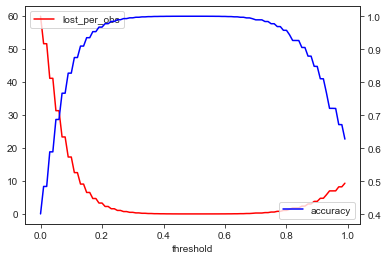

In [127]:
rf_model.fit(X_train_, y_train)

y_train, y_model_pred = y_train, rf_model.predict_proba(X_train_)[:,1]
threshold_plot(y_train, y_model_pred)

#### Fitted the model with optimal threshold to the test dataset then evaluated all 5 model matices.

In [128]:
y_true, y_pred = y_test, rf_model.predict_proba(X_test_)[:,1]

threshold = 0.51
y_pred = [int(p >= threshold) for p in y_pred]
report = classification_report(y_true, y_pred, output_dict=True)

model_name = 'Random Forest (th=' + str(threshold) + ')'

r = [model_name, report['accuracy'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], lost_per_obs(y_true, y_pred)]
test_matrices.loc[len(test_matrices)] = r
test_matrices

,model,acc,precision,recall,f1,money_lost_per_obs
0,Logistic Regression (th=0.85),0.620875,0.745158,0.530269,0.441123,9.759375
1,Random Forest (th=0.51),0.916000,0.919327,0.905776,0.911335,3.979687


---
<img src="https://www.nvidia.com/content/dam/en-zz/Solutions/glossary/data-science/xgboost/img-3.png" style="float: right" width="400"/>

### **XGBoost** (eXtreme Gradient Boosting)
XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. XGBoost was developed to increase speed and performance, while introducing regularization parameters to reduce overfitting. Gradient boosted trees use regression trees (or CART) in a sequential learning process as weak learners.

There are some Advantages of the XGBoost Algorithm:
- Usage on a wide range of applications, including solving problems in regression, classification, ranking, and user-defined prediction challenges
- A library that was built from the ground up to be efficient, flexible, and portable
- It is designed to handle missing data with its in-build features.

###### *<div style="text-align: right">Image Credits: https://www.nvidia.com/en-us/glossary/data-science/xgboost/</div>*

To build the XGBoost model, we used the steps below:
1. Used **RandomizedSearchCV** to find the best model parameters. Same as the model above, we commented this block of code out to help save time in case of code re-execute.
2. We then fitted the model best parameter to the train dataset using **coss_validation (cv=5)**.
3. We plotted line graph for model's Monetary Loss per Prediction and Accuracy against threshold number to find the optimal threshold, using the 'threshold_plot' function.
4. Finally, we fitted the model with optimal threshold to the test dataset then evaluated all 5 model matices.


#### Use RandomizedSearchCV to Find Best Model Parameters

In [34]:
# xg = XGBClassifier(
#     nthread = 4,
#     seed = 42
# )

# # Setup model parameters for RandomSearchCV
# param_grid = {
#     'subsample': [0.4, 0.6, 0.8],
#     'reg_alpha': [3.2, 6.4, 12.8],
#     'reg_lambda': [3.2, 6.4, 12.8],
#     'learning_rate': [0.1, 0.15, 0.2, 0.25],
#     'gamma': [0.8, 1, 1.2],
#     'max_depth': [10, 20, 35],
#     'n_estimators': [100, 150, 200],
#     'min_child_weight': [5, 10, 15]
# }

# xg_ = RandomizedSearchCV(xg, param_grid, scoring=make_scorer(lost_per_obs, greater_is_better=False), n_jobs=-1, verbose=0, random_state=42)
# xg_.fit(X_train_, y_train)
# xg_.best_params_

#### Fitted Model Best Parameter to the Train Dataset Using coss_validation (cv=5)

In [129]:
xgb_model = XGBClassifier(
    nthread = 4,
    seed = 42,
    subsample = 0.6,
    reg_alpha = 3.2,
    reg_lambda = 12.8,
    learning_rate = .15, 
    gamma = 0.8,
    max_depth = 25,
    n_estimators = 150, 
    min_child_weight = 5
)

model_xgb = cross_validate(xgb_model, X_train_, y_train, cv=5, scoring=scorer, error_score="raise")

print("Mean Accuracy = ",model_xgb['test_accuracy'].mean())
print("Mean Precision = ",model_xgb['test_precision'].mean())
print("Mean Recall = ",model_xgb['test_recall'].mean())
print("Mean F1 = ",model_xgb['test_F1'].mean())
print("Mean Monetary Loss per Prediction = ",model_xgb['test_money_lost'].mean())

Mean Accuracy =  0.938638888888889
Mean Precision =  0.9375897971148139
Mean Recall =  0.9343976551864625
Mean F1 =  0.9359122432489414
Mean Monetary Loss per Prediction =  -3.5173611111111107


#### Plotted line graph for model's Monetary Loss per Prediction and Accuracy to find the opitimal threshold.

Top 5 thresholds with the smallest amounts of monetary loss per prediction are:
     threshold  accuracy  lost_per_obs
60       0.60  0.987278      0.492014
59       0.59  0.987681      0.492361
58       0.58  0.988090      0.493056
57       0.57  0.988507      0.494097
61       0.61  0.986806      0.497049


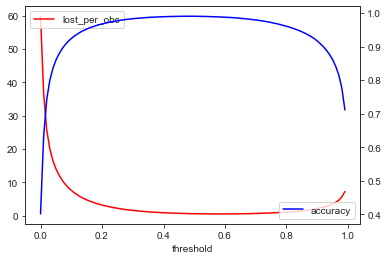

In [130]:
xgb_model.fit(X_train_, y_train)

y_train, y_model_pred = y_train, xgb_model.predict_proba(X_train_)[:,1]
threshold_plot(y_train, y_model_pred)

#### Fitted the model with optimal threshold to the test dataset then evaluated all 5 model matices.

In [131]:
y_true, y_pred = y_test, xgb_model.predict_proba(X_test_)[:,1]

threshold = 0.6
y_pred = [int(p >= threshold) for p in y_pred]
report = classification_report(y_true, y_pred, output_dict=True)

model_name = 'XGBoost (th=' + str(threshold) + ')'

x = [model_name, report['accuracy'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], lost_per_obs(y_true, y_pred)]
test_matrices.loc[len(test_matrices)] = x
test_matrices

,model,acc,precision,recall,f1,money_lost_per_obs
0,Logistic Regression (th=0.85),0.620875,0.745158,0.530269,0.441123,9.759375
1,Random Forest (th=0.51),0.916000,0.919327,0.905776,0.911335,3.979687
2,XGBoost (th=0.6),0.942187,0.945091,0.934745,0.939224,2.664062


---
<img src="https://miro.medium.com/max/1400/1*bhFifratH9DjKqMBTeQG5A.gif" style="float: right" width="500"/>

### **Neural Network**
Neural Network or Artificial Neural Network (ANN) is computing system inspired by biological neural network that constitute animal brain. Such systems “learn” to perform tasks by considering examples, generally without being programmed with any task-specific rules. A Neural Network made of many units of neurons  (also referred to as a "node") which are grouped into layers.<br>

There are 3 main components of the layers:
- **Input layer** — Initial data for the neural network.
- **Hidden layer(s)** — Intermediate layer between input and output layer and place where all the computation is done.
- **Output layer** — Produce the result for given inputs.

**Dense Neural Network:** A dense layer is a layer that is deeply connected with its preceding layer which means the neurons of the layer are connected to every neuron of its preceding layer.

There are some Advantages of the Neural Network Algorithm:
- Neural Networks have the ability to learn by themselves and produce the output that is not limited to the input provided to them.
- Even if a neuron is not responding or a piece of information is missing, the network can detect the fault and still produce the output.
- They can perform multiple tasks in parallel without affecting the system performance.

###### *<div style="text-align: right">Image Credits: https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a</div>*

To build the Neural Network model, we used the steps below:
1. We fitted a neural network model that contains:
    - First hidden layer with 256 neurons and Relu Activation Function
    - Second hidden layer with 128 neurons, Relu Activation Function, and Kernal Regularizer (L2) with penalty of 0.01
    - Dropout layer with 0.2 dropout rate added
    - Third hidden layer with 64 neurons and Relu Activation Function
    - Fourth hidden layer with 32 neurons and Relu Activation Function
    - Output layer with Sigmoid Activation Function
3. We plotted line graph for model's Monetary Loss per Prediction and Accuracy against threshold number to find the optimal threshold, using the 'threshold_plot' function.
4. Finally, we fitted the model with optimal threshold to the test dataset then evaluated all 5 model matices.

#### Import TensorFlow and check for the version

In [132]:
# TensorFlow and tf.keras
import tensorflow as tf
tf.random.set_seed(1234)

print(tf.__version__)

2.9.1


#### Created Metric Functions

In [133]:
import keras.backend as K

# define metrics
def Recall(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def Precision(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def F1(y_true, y_pred):
    precision = Precision(y_true, y_pred)
    recall = Recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

#### Fitted a Model to the Train Dataset

In [134]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)
# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.

nn = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu', input_shape=(X_train_.shape[1], )),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')                       
])


nn.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['binary_crossentropy', 'accuracy', Precision, Recall, F1])
    
nn_ = nn.fit(X_train_, y_train, validation_split=0.1, epochs=100, batch_size=10000, verbose=0, callbacks=[callback])

In [135]:
nn_eval = nn.evaluate(X_test_, y_test, batch_size=10000)
nn_eval

2/2 [==============================] - 0s 27ms/step - loss: 0.2080 - binary_crossentropy: 0.1995 - accuracy: 0.9429 - Precision: 0.9476 - Recall: 0.9085 - F1: 0.9276


[0.20801709592342377,
 0.19948676228523254,
 0.9429374933242798,
 0.9476134777069092,
 0.908493161201477,
 0.9276366233825684]

#### Plotted line graph for model's Monetary Loss per Prediction and Accuracy to find the opitimal threshold.

4500/4500 [==============================] - 11s 2ms/step
Top 5 thresholds with the smallest amounts of monetary loss per prediction are:
     threshold  accuracy  lost_per_obs
77       0.77  0.943083      2.109896
78       0.78  0.941958      2.111979
76       0.76  0.944000      2.116667
79       0.79  0.940472      2.121007
75       0.75  0.944847      2.127257


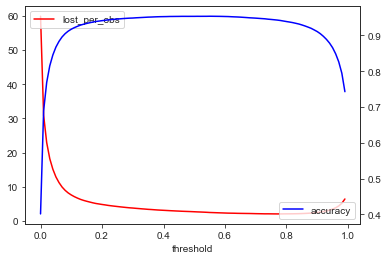

In [136]:
nn.fit(X_train_, y_train, verbose=0)

y_train, y_model_pred = y_train, nn.predict(X_train_)
threshold_plot(y_train, y_model_pred)

#### Fitted the model with optimal threshold to the test dataset then evaluated all 5 model matices.

In [137]:
y_true, y_pred = y_test, nn.predict(X_test_)

threshold = 0.77
y_pred = [int(p >= threshold) for p in y_pred]
report = classification_report(y_true, y_pred, output_dict=True)

model_name = 'Neural Network (th=' + str(threshold) + ')'

n = [model_name, nn_eval[2], nn_eval[3], nn_eval[4], nn_eval[5], lost_per_obs(y_true, y_pred)]
test_matrices.loc[len(test_matrices)] = n
test_matrices

500/500 [==============================] - 1s 3ms/step


,model,acc,precision,recall,f1,money_lost_per_obs
0,Logistic Regression (th=0.85),0.620875,0.745158,0.530269,0.441123,9.759375
1,Random Forest (th=0.51),0.916000,0.919327,0.905776,0.911335,3.979687
2,XGBoost (th=0.6),0.942187,0.945091,0.934745,0.939224,2.664062
3,Neural Network (th=0.77),0.942937,0.947613,0.908493,0.927637,2.348438


---
<img src="https://miro.medium.com/max/1400/1*22Ukd9hgt1rOV6k0RXwOBA.png" style="float: right" width="500"/>

### **Ensemble Model**

Ensemble modeling is a process where multiple diverse models are created to predict an outcome, either by using many different modeling algorithms or using different training data sets. The ensemble model then aggregates the prediction of each base model and results in once final prediction for the unseen data.

There are two main reasons to use an ensemble over a single model, and they are related; they are:
- **Performance**: An ensemble can make better predictions and achieve better performance than any single contributing model.
- **Robustness**: An ensemble reduces the spread or dispersion of the predictions and model performance.

###### *<div style="text-align: right">Image Credits: https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c</div>*

To build the Ensemble models, we used the steps below:
1. Created 'ensemble_train' and 'ensemble_test' datasets using predicted probability values from the above Logistic Regression, Random Forest, XGBoost, and Neural Network models. 
2. We fitted the models below to the ensemble_train dataset:
    - A) Linear Regression
    - B) Neural Network
3. Plotted line graph for model's Monetary Loss per Prediction and Accuracy against threshold number to find the optimal threshold, using the 'threshold_plot' function.
4. Finally, we fitted the model with optimal threshold to the ensemble_test then evaluated all 5 model matices.

In [138]:
from sklearn.model_selection import cross_val_predict, cross_val_score

#### Created 'ensemble_train' and 'ensemble_test' datasets using predicted probability values from the above Logistic Regression, Random Forest, XGBoost, and Neural Network models.

In [139]:
lr_pred_train = cross_val_predict(lr_model, X_train_, y_train, cv=5, method='predict_proba')
lr_pred_test = cross_val_predict(lr_model, X_test_, y_test, cv=5, method='predict_proba')

In [140]:
rf_pred_train = cross_val_predict(rf_model, X_train_, y_train, cv=5, method='predict_proba')
rf_pred_test = cross_val_predict(rf_model, X_test_, y_test, cv=5, method='predict_proba')

In [141]:
xgb_pred_train = cross_val_predict(xgb_model, X_train_, y_train, cv=5, method='predict_proba')
xgb_pred_test = cross_val_predict(xgb_model, X_test_, y_test, cv=5, method='predict_proba')

In [142]:
nn_pred_test = nn.predict(X_test_)
nn_pred_train = nn.predict(X_train_)

4500/4500 [==============================] - 7s 1ms/step


In [143]:
ensemble_train = pd.DataFrame()
ensemble_train['lr'] = lr_pred_train[:,1]
ensemble_train['rf'] = rf_pred_train[:,1]
ensemble_train['xgb'] = xgb_pred_train[:,1]
ensemble_train['nn'] = nn_pred_train
ensemble_train.head()

,lr,rf,xgb,nn
0,0.402975,0.70,0.964188,0.945750
1,0.275667,0.18,0.021142,0.045306
2,0.532003,0.86,0.996554,0.984241
3,0.373280,0.32,0.081311,0.008379
4,0.305621,0.14,0.010569,0.001201


In [144]:
ensemble_test = pd.DataFrame()
ensemble_test['lr'] = lr_pred_test[:,1]
ensemble_test['rf'] = rf_pred_test[:,1]
ensemble_test['xgb'] = xgb_pred_test[:,1]
ensemble_test['nn'] = nn_pred_test
ensemble_test.head()

,lr,rf,xgb,nn
0,0.258849,0.28,0.066206,0.306887
1,0.280867,0.34,0.182566,0.000387
2,0.190550,0.18,0.054385,0.000047
3,0.426050,0.38,0.115137,0.038625
4,0.287398,0.34,0.140770,0.014037


### **Linear Regression Ensemble Model**
#### Fitted a simple linear regression model to the train dataset then plotted line graph for model's Monetary Loss per Prediction and Accuracy to find the opitimal threshold.

Top 5 thresholds with the smallest amounts of monetary loss per prediction are:
     threshold  accuracy  lost_per_obs
74       0.74  0.945458      2.058854
73       0.73  0.946521      2.059896
75       0.75  0.944264      2.060069
72       0.72  0.947549      2.062847
71       0.71  0.948583      2.065625


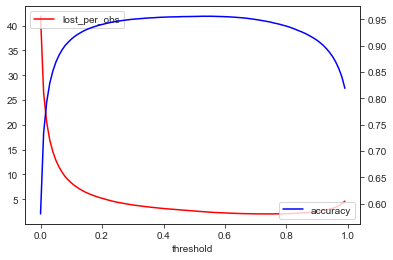

In [145]:
from sklearn.linear_model import LinearRegression

linear_r = LinearRegression()

linear_r.fit(ensemble_train, y_train)

y_train, y_model_pred = y_train, linear_r.predict(ensemble_train)
threshold_plot(y_train, y_model_pred)

#### Fitted the model with optimal threshold to the test dataset then evaluated all 5 model matices.

In [146]:
y_true, y_pred = y_test, linear_r.predict(ensemble_test)

threshold = 0.74
y_pred = [int(p >= threshold) for p in y_pred]
report = classification_report(y_true, y_pred, output_dict=True)

model_name = 'Ensemble - Linear Regression (th=' + str(threshold) + ')'

ln = [model_name, report['accuracy'], report['macro avg']['precision'], report['macro avg']['recall'], report['macro avg']['f1-score'], lost_per_obs(y_true, y_pred)]
test_matrices.loc[len(test_matrices)] = ln
test_matrices

,model,acc,precision,recall,f1,money_lost_per_obs
0,Logistic Regression (th=0.85),0.620875,0.745158,0.530269,0.441123,9.759375
1,Random Forest (th=0.51),0.916000,0.919327,0.905776,0.911335,3.979687
2,XGBoost (th=0.6),0.942187,0.945091,0.934745,0.939224,2.664062
3,Neural Network (th=0.77),0.942937,0.947613,0.908493,0.927637,2.348438
4,Ensemble - Linear Regression (th=0.74),0.936438,0.944384,0.925006,0.932576,2.329687


### **Neural Network Ensemble Model**
#### Fitted a neural network model to the train dataset then plotted line graph for model's Monetary Loss per Prediction and Accuracy to find the opitimal threshold.

In [147]:
callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)
# This callback will stop the training when there is no improvement in the loss for three consecutive epochs.

nn_e = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation = 'relu', input_shape=(ensemble_train.shape[1], )),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')                       
])

nn_e.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['binary_crossentropy', 'accuracy', Precision, Recall, F1])

nn_ = nn_e.fit(ensemble_train, y_train, validation_split=0.1, epochs=100, batch_size=10000, verbose=0, callbacks=[callback])


4500/4500 [==============================] - 10s 2ms/step
Top 5 thresholds with the smallest amounts of monetary loss per prediction are:
     threshold  accuracy  lost_per_obs
91       0.91  0.943806      2.060069
92       0.92  0.942375      2.065104
90       0.90  0.945076      2.065278
89       0.89  0.946181      2.069965
93       0.93  0.940639      2.070486


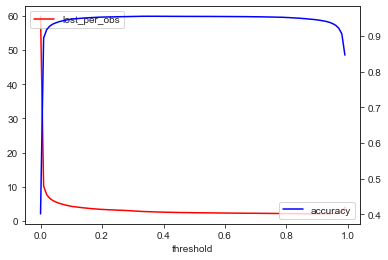

In [149]:
nn_e.fit(ensemble_train, y_train, verbose=0)

y_train, y_model_pred = y_train, nn_e.predict(ensemble_train)
threshold_plot(y_train, y_model_pred)

In [154]:
nn_eval_e = nn_e.evaluate(ensemble_test, y_test, batch_size=10000)

y_true, y_pred = y_test, nn_e.predict(ensemble_test)

threshold = 0.91
y_pred = [int(p >= threshold) for p in y_pred]
report = classification_report(y_true, y_pred, output_dict=True)

model_name = 'Ensemble - Neural Network (th=' + str(threshold) + ')'

n = [model_name, nn_eval_e[2], nn_eval_e[3], nn_eval_e[4], nn_eval_e[5], lost_per_obs(y_true, y_pred)]
test_matrices.loc[len(test_matrices)] = n
test_matrices

500/500 [==============================] - 1s 3ms/step


,model,acc,precision,recall,f1,money_lost_per_obs
0,Logistic Regression (th=0.85),0.620875,0.745158,0.530269,0.441123,9.759375
1,Random Forest (th=0.51),0.916000,0.919327,0.905776,0.911335,3.979687
2,XGBoost (th=0.6),0.942187,0.945091,0.934745,0.939224,2.664062
3,Neural Network (th=0.77),0.942937,0.947613,0.908493,0.927637,2.348438
4,Ensemble - Linear Regression (th=0.74),0.936438,0.944384,0.925006,0.932576,2.329687
5,Ensemble - Neural Network (th=0.91),0.947688,0.950124,0.918680,0.934128,2.296875


---
### Results

The table and the combination chart below that are **the model matrices on test dataset** for **model's Accuracy, Precision, Recall, F1-score, and Monetary Loss per Prediction (in USD)**.

In [155]:
test_matrices

,model,acc,precision,recall,f1,money_lost_per_obs
0,Logistic Regression (th=0.85),0.620875,0.745158,0.530269,0.441123,9.759375
1,Random Forest (th=0.51),0.916000,0.919327,0.905776,0.911335,3.979687
2,XGBoost (th=0.6),0.942187,0.945091,0.934745,0.939224,2.664062
3,Neural Network (th=0.77),0.942937,0.947613,0.908493,0.927637,2.348438
4,Ensemble - Linear Regression (th=0.74),0.936438,0.944384,0.925006,0.932576,2.329687
5,Ensemble - Neural Network (th=0.91),0.947688,0.950124,0.918680,0.934128,2.296875


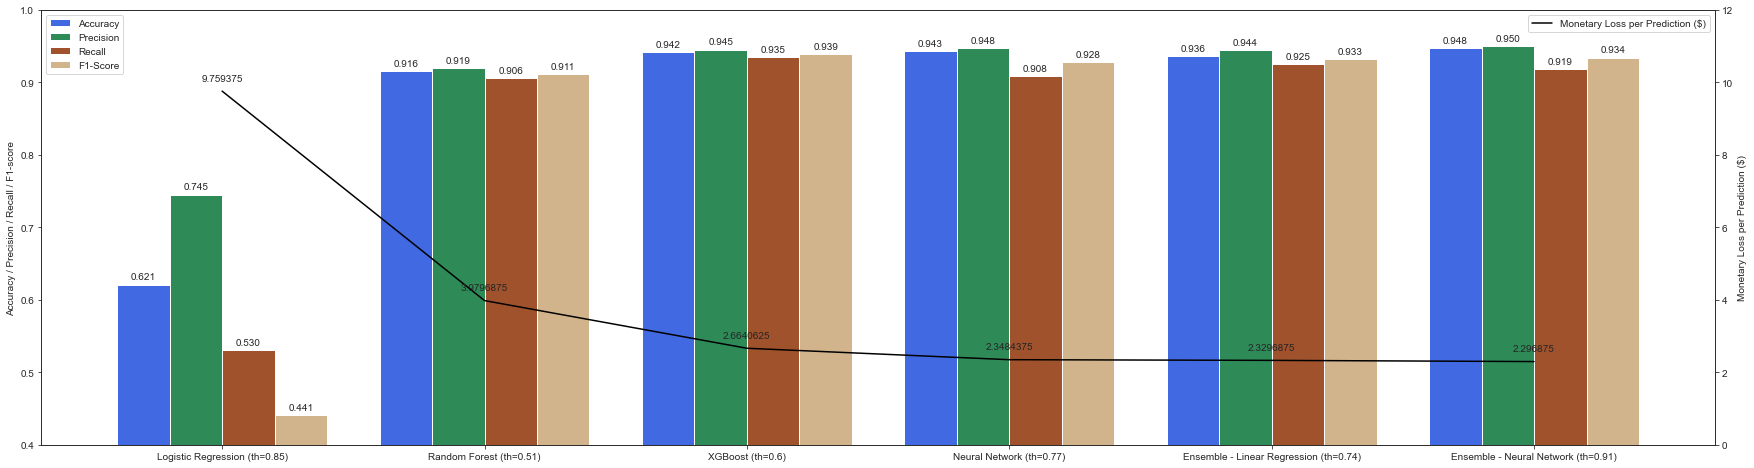

In [177]:
# Create figure and axis #1
fig, ax1 = plt.subplots(figsize=(30,8))
# plot line chart on axis #1
x = np.arange(len(test_matrices['model']))  # the label locations
width = 0.2  # the width of the bars

a1 = ax1.bar(x-width*1.5, test_matrices['acc'], width, color='royalblue', label = 'Accuracy')
a2 = ax1.bar(x-width/2, test_matrices['precision'], width, color='seagreen', label='Precision')
a3 = ax1.bar(x+width/2, test_matrices['recall'], width, color='sienna', label = 'Recall')
a4 = ax1.bar(x+width*1.5, test_matrices['f1'], width, color='tan', label = 'F1-Score')
ax1.bar_label(a1, padding=3, fmt='%.3f')
ax1.bar_label(a2, padding=3, fmt='%.3f')
ax1.bar_label(a3, padding=3, fmt='%.3f')
ax1.bar_label(a4, padding=3, fmt='%.3f')
ax1.grid(False) # turn off grid #2
ax1.set_ylabel('Accuracy / Precision / Recall / F1-score')
ax1.set_ylim(0.4, 1)
ax1.legend(loc="upper left")
# plt.grid(axis='y', color = 'gainsboro')
# set up the 2nd axis
ax2 = ax1.twinx()
# plot bar chart on axis #2

ax2.plot(test_matrices['model'], test_matrices['money_lost_per_obs'], color='black')
for x, y in zip(test_matrices['model'], test_matrices['money_lost_per_obs']):
    label = y
    plt.annotate(label, (x, y),
                 xycoords="data",
                 textcoords="offset points",
                 xytext=(0, 10), ha="center")
ax2.set_ylabel('Monetary Loss per Prediction ($)')
ax2.set_ylim(0, 12)
ax2.legend(['Monetary Loss per Prediction ($)'], loc="upper right")

plt.show()

From the table and the combination chart above, we can see that the **X model** gives the best performance not only for the montary loss per prediction but also all other 4 matrices.


### Conclusions
- The objective for this case study is to build a classification model for an anonymized dataset to **minimize the monetary loss** due to incorrect predictions for the client. Model interpretability is not a requirement.
- Missing values were present in every feature of the dataset, although the feature that has the most missing values (is (x23) only contains 47 missing value or less than 0.03%.
- To fill in the missing values; For the categorical variables (x24, x29, and x30) and categorical numerical variable (x32), the most frequently occurring value or mode was used.<br>For the continuous variables with high high std compare to other features (x7, x46, and x37), the median was used. Median was used to fill missing values in the columns where an outlier occurred, because it is more resilient to outliers than the mean.<br>For other continuous variables, the mean was used.
- Five different models: Logistice Regression, Random Forest, XGBoost, Dense Neural Networks, Linear Regression Ensemble and Neural Network Ensemble models were built and evaluated for this case study.
- To evaluate the models performance, we were looking at 5 matrices; Monetary Loss per Prediction (in USD), Accuracy, Precision, Recall, and F1-score.
- The **Xmodel was the best performing model** among the 5 model with a **Monetary Loss per Prediction (in USD) of $xx** and accuracy of xx.
- This means that **if there are 10 prediction you make using the X model, in average, you will lose $xx**!!! So much better than losing $100 for a single incorrectly predicted Class '1' or $25 for a single incorrectly predicted Class '0'!!!!!

---
### Moving Forward and Future Research

- For the top 2 best models, Neural Network and Ensemble models, we came up with only one model for each one.<br>
Different structure of Neural Network model could be use.<br>
This also apply to the ensemble model, other algorithms could be use here.<br>
Adjusting those can help improving the model performance.
- Rhe client’s insight on the features would be interesting. Even without disclosing what the data represents, their domain knowledge about relationships of the features to the target, and interactions between features could provide additional feature creation.